In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess data (you might need to adapt this based on the chosen dataset)
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split data for training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# 1.1
# creating a simple feedforward neural network
def create_feedforward_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# creating a simple convolutional neural network (CNN)
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# for training and evaluating feedforward neural network
feedforward_model = create_feedforward_model()
feedforward_model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])
history_feedforward = feedforward_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# for Training and evaluating the CNN
cnn_model = create_cnn_model()
cnn_model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])
history_cnn = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 14s 8ms/step - loss: 1.9100 - accuracy: 0.3160 - val_loss: 1.7522 - val_accuracy: 0.3703
Epoch 2/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.7282 - accuracy: 0.3844 - val_loss: 1.6823 - val_accuracy: 0.3928
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6596 - accuracy: 0.4062 - val_loss: 1.6398 - val_accuracy: 0.4124
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6187 - accuracy: 0.4202 - val_loss: 1.6174 - val_accuracy: 0.4142
Epoch 5/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5771 - accuracy: 0.4347 - val_loss: 1.6035 - val_accuracy: 0.4227
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5459 - accuracy: 0.4509 - val_loss: 1.5885 - val_accuracy: 0.4284
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5261 - accuracy: 0.4564 - val_loss: 1.5533 - val_accuracy

In [ ]:
# training and evaluating a model
def train_and_evaluate_model(model, x_train, y_train, x_val, y_val, optimizer, loss_function, metrics, epochs=10):
    model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val))
    return history

# Experiment with different loss functions and training protocols for feedforward neural network
history_feedforward_mse = train_and_evaluate_model(create_feedforward_model(), x_train, y_train, x_val, y_val,
                                                    optimizer=Adam(), loss_function=MeanSquaredError(), metrics=['accuracy'])

# Experiment with different loss functions and training protocols for CNN
history_cnn_mse = train_and_evaluate_model(create_cnn_model(), x_train, y_train, x_val, y_val,
                                            optimizer=Adam(), loss_function=MeanSquaredError(), metrics=['accuracy'])

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0811 - accuracy: 0.3029 - val_loss: 0.0762 - val_accuracy: 0.3727
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0757 - accuracy: 0.3753 - val_loss: 0.0762 - val_accuracy: 0.3670
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0735 - accuracy: 0.3981 - val_loss: 0.0722 - val_accuracy: 0.4147
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0719 - accuracy: 0.4171 - val_loss: 0.0728 - val_accuracy: 0.4071
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0707 - accuracy: 0.4304 - val_loss: 0.0705 - val_accuracy: 0.4271
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0697 - accuracy: 0.4403 - val_loss: 0.0711 - val_accuracy: 0.4260
Epoch 7/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.0689 - accuracy: 0.4487 - val_loss: 0.0693 - val_accuracy:

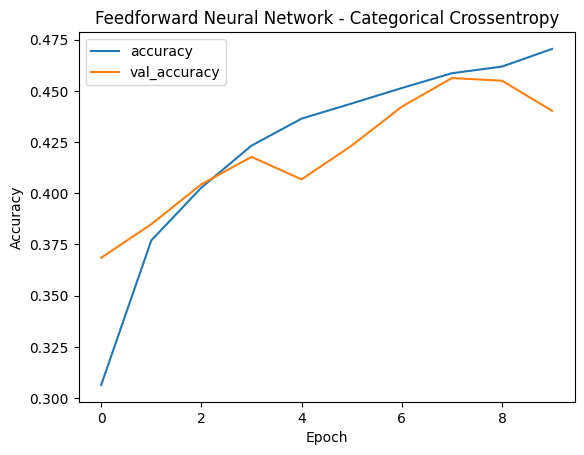

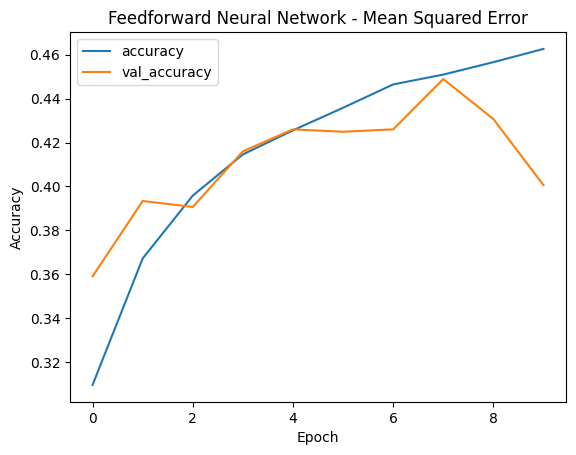

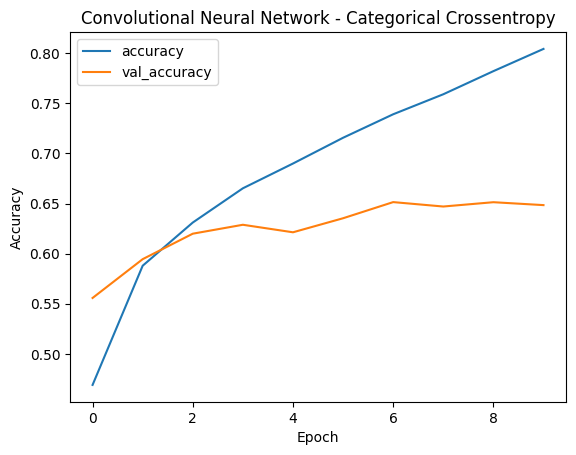

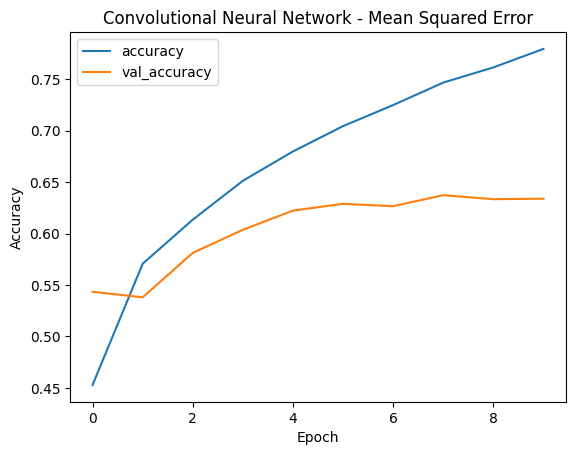

In [ ]:
# Function to plot training history
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot training history for feedforward neural network
plot_history(history_feedforward, 'Feedforward Neural Network - Categorical Crossentropy')
plot_history(history_feedforward_mse, 'Feedforward Neural Network - Mean Squared Error')

# Plot training history for CNN
plot_history(history_cnn, 'Convolutional Neural Network - Categorical Crossentropy')
plot_history(history_cnn_mse, 'Convolutional Neural Network - Mean Squared Error')

In [ ]:
# Question 2
# Function to create and compile a CNN with different architectures
def create_compiled_cnn_model(filters, kernel_size, pool_size, dense_units, optimizer):
    model = Sequential()
    model.add(Conv2D(filters, kernel_size, activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
    return model

# Experiment with different CNN architectures
cnn_model_1 = create_compiled_cnn_model(filters=32, kernel_size=(3, 3), pool_size=(2, 2), dense_units=128, optimizer=Adam())
cnn_model_2 = create_compiled_cnn_model(filters=64, kernel_size=(3, 3), pool_size=(2, 2), dense_units=256, optimizer=Adam())
cnn_model_3 = create_compiled_cnn_model(filters=64, kernel_size=(5, 5), pool_size=(2, 2), dense_units=128, optimizer=Adam())

history_cnn_1 = cnn_model_1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
history_cnn_2 = cnn_model_2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
history_cnn_3 = cnn_model_3.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5392 - accuracy: 0.4509 - val_loss: 1.2844 - val_accuracy: 0.5443
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2190 - accuracy: 0.5700 - val_loss: 1.2054 - val_accuracy: 0.5853
Epoch 3/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.0946 - accuracy: 0.6174 - val_loss: 1.1708 - val_accuracy: 0.5919
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9989 - accuracy: 0.6507 - val_loss: 1.0611 - val_accuracy: 0.6305
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9250 - accuracy: 0.6772 - val_loss: 1.0526 - val_accuracy: 0.6419
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8625 - accuracy: 0.6975 - val_loss: 1.0846 - val_accuracy: 0.6307
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8057 - accuracy: 0.7180 - val_loss: 1.0391 - val_accuracy:

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Assuming create_compiled_cnn_model is defined somewhere in your code

# Function to perform hyperparameter tuning for CNN models
def hyperparameter_tuning_cnn(learning_rate, batch_size, dropout_rate):
    model = create_compiled_cnn_model(filters=64, kernel_size=(3, 3), pool_size=(2, 2), dense_units=128, optimizer=Adam(learning_rate))
    model.compile(optimizer=Adam(learning_rate), loss=CategoricalCrossentropy(), metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=batch_size)
    return history

# Perform hyperparameter tuning for CNN
history_cnn_tuned = hyperparameter_tuning_cnn(learning_rate=0.001, batch_size=64, dropout_rate=0)

Epoch 1/10
625/625 [==============================] - 6s 7ms/step - loss: 1.4699 - accuracy: 0.4781 - val_loss: 1.2530 - val_accuracy: 0.5591
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 1.1773 - accuracy: 0.5867 - val_loss: 1.1390 - val_accuracy: 0.5960
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 1.0332 - accuracy: 0.6385 - val_loss: 1.0911 - val_accuracy: 0.6155
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.9218 - accuracy: 0.6769 - val_loss: 1.0013 - val_accuracy: 0.6543
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.8294 - accuracy: 0.7078 - val_loss: 1.0692 - val_accuracy: 0.6302
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.7490 - accuracy: 0.7390 - val_loss: 1.0564 - val_accuracy: 0.6459
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.6711 - accuracy: 0.7662 - val_loss: 1.0169 - val_accuracy: 0.6588
Epoch 